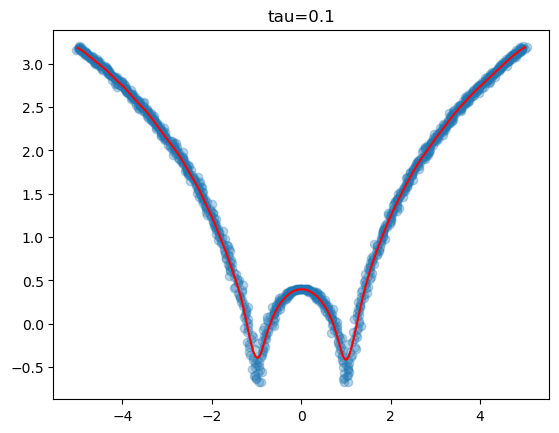

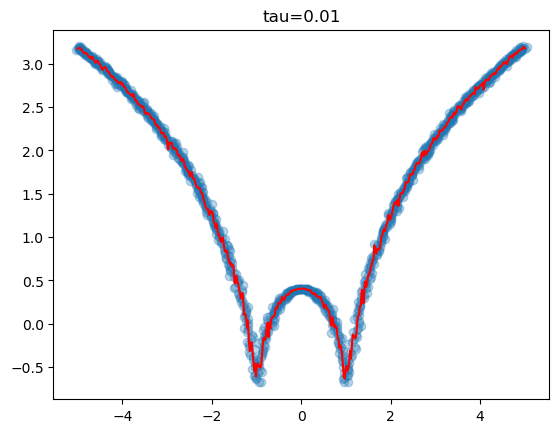

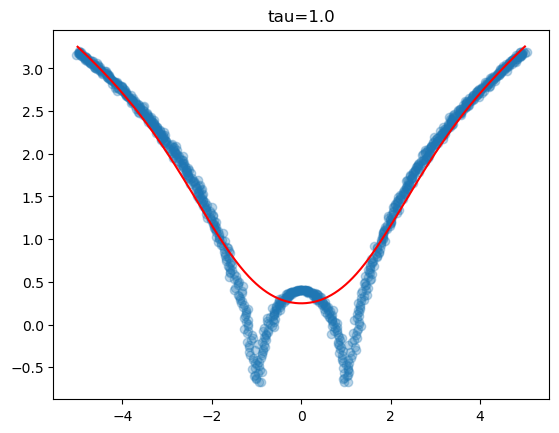

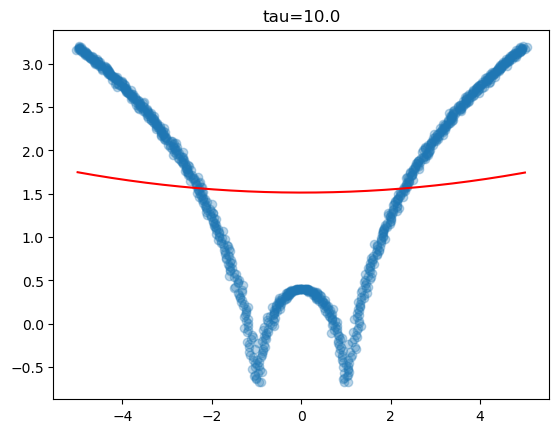

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,1000)
y = np.log(np.abs((x**2)-1)+0.5)
x = x + np.random.normal(scale=0.05,size=1000)

def local_regression(x0,x,y,tau):
    x0 = np.r_[1,x0]
    x = np.c_[np.ones(len(x)),x]
    xw = x.T * radial_kernel(x0,x,tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta

def radial_kernel(x0,x,tau):
    return np.exp(np.sum((x-x0)**2,axis=1)/(-2*tau**2))

def plot_lr(tau):
    domain = np.linspace(-5,5,num=500)
    pred = [local_regression(x0,x,y,tau) for x0 in domain]
    plt.scatter(x,y,alpha=0.3)
    plt.plot(domain,pred,color="red")
    return plt


plt.title("tau=0.1")
plot_lr(0.1).show()
plt.title("tau=0.01")
plot_lr(0.01).show()
plt.title("tau=1.0")
plot_lr(1.0).show()
plt.title("tau=10.0")
plot_lr(10.0).show()
